In [5]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




ERROR: Error in library("pracma"): there is no package called 'pracma'


In [6]:
# TA-provided helper functions
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [30]:
# ER model question 1a and 1b
er_1ab = function(p, n=1000, iterations=1000) {
    set.seed(0)
    g = erdos.renyi.game(n, p, directed=F)
    plot(degree.distribution(g), main=paste("Degree distribution with p = ", p), xlab="Degree", ylab="Frequency")
    
    # 1a
    print(paste("Mean: ", mean(degree(g))))
    print(paste("Variance: ", var(degree(g))))
    
    # 1b
    # To numerically approximate, we create 1000 graphs for each p
    n_connected = 0
    connected = TRUE
    for (i in 1:iterations) {
        g_i = erdos.renyi.game(n, p, directed=F)
        if (is_connected(g_i)) {
            n_connected = n_connected + 1
        } else {
            connected = FALSE
            # need an unconnected graph for later
            unconnected_graph = g_i
        }
    }
    
    print(paste("All realizations connected: ", connected))
    print(paste("Probability to be connected: ", (n_connected / iterations)))
    
    if (!connected) {
        # GCC logic provided by TA Arash
        g = unconnected_graph
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == ix))
        
        print(paste("Diameter of GCC: ", diameter(gcc)))
    }    
}

[1] "Mean:  3.122"
[1] "Variance:  3.30842442442442"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  14"


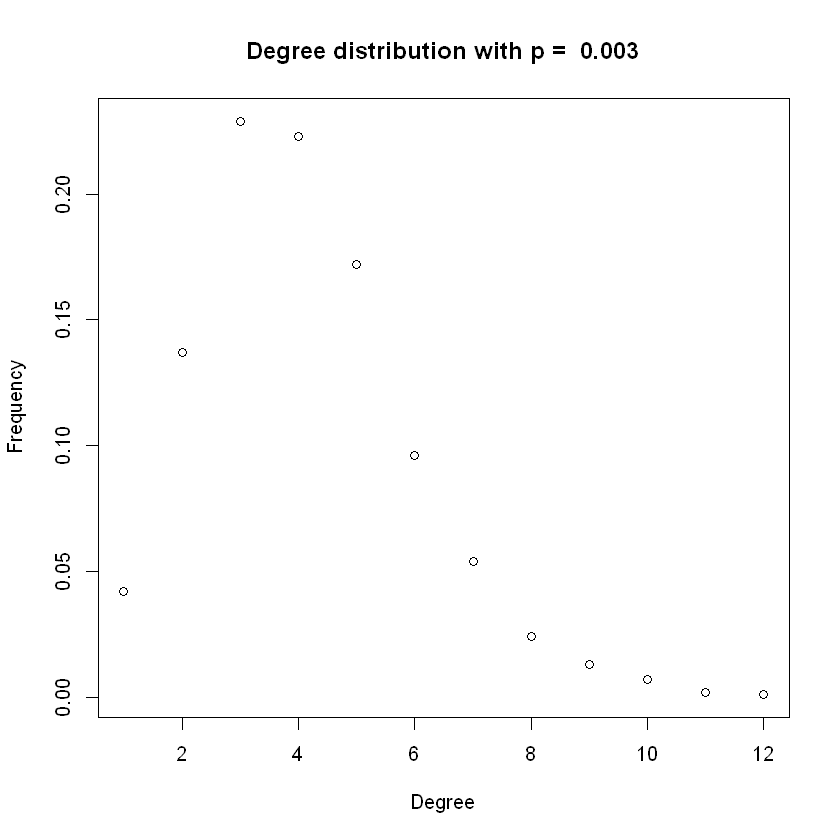

In [31]:
er_1ab(0.003)

[1] "Mean:  4.034"
[1] "Variance:  3.91876276276276"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0"
[1] "Diameter of GCC:  10"


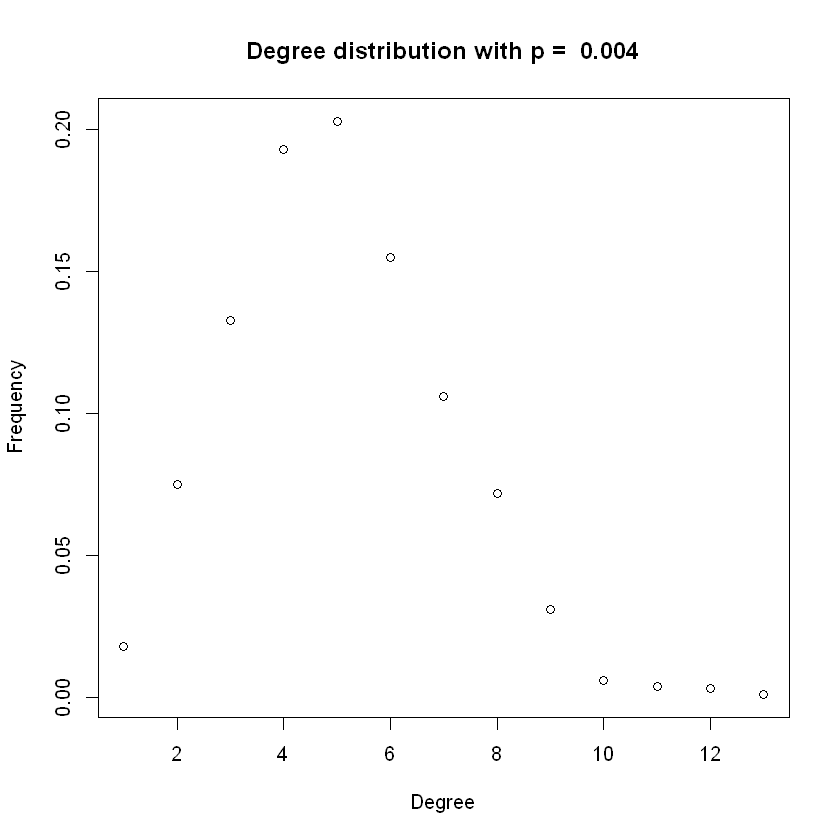

In [32]:
er_1ab(0.004)

[1] "Mean:  10.03"
[1] "Variance:  9.80890890890891"
[1] "All realizations connected:  FALSE"
[1] "Probability to be connected:  0.932"
[1] "Diameter of GCC:  6"


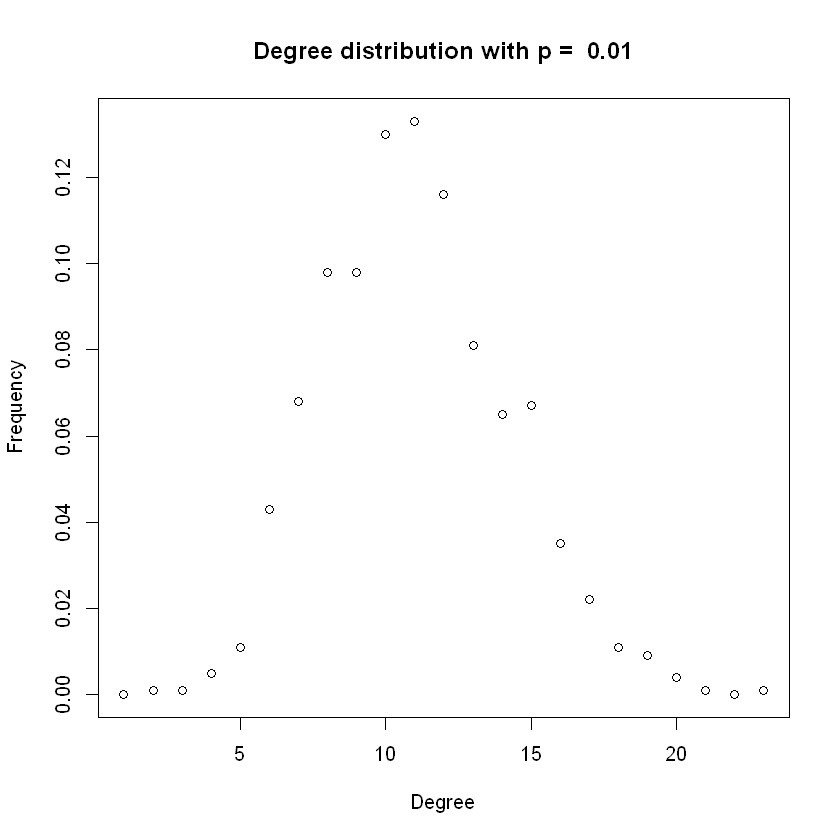

In [33]:
er_1ab(0.01)

[1] "Mean:  50.012"
[1] "Variance:  48.4182742742743"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


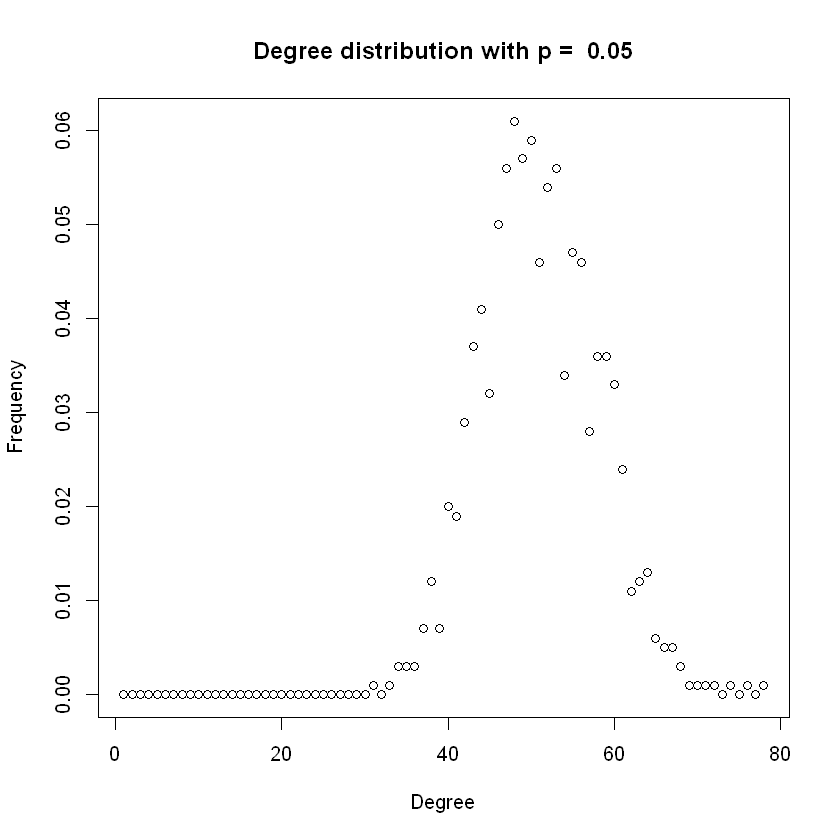

In [36]:
er_1ab(0.05)

[1] "Mean:  100.184"
[1] "Variance:  91.3514954954955"
[1] "All realizations connected:  TRUE"
[1] "Probability to be connected:  1"


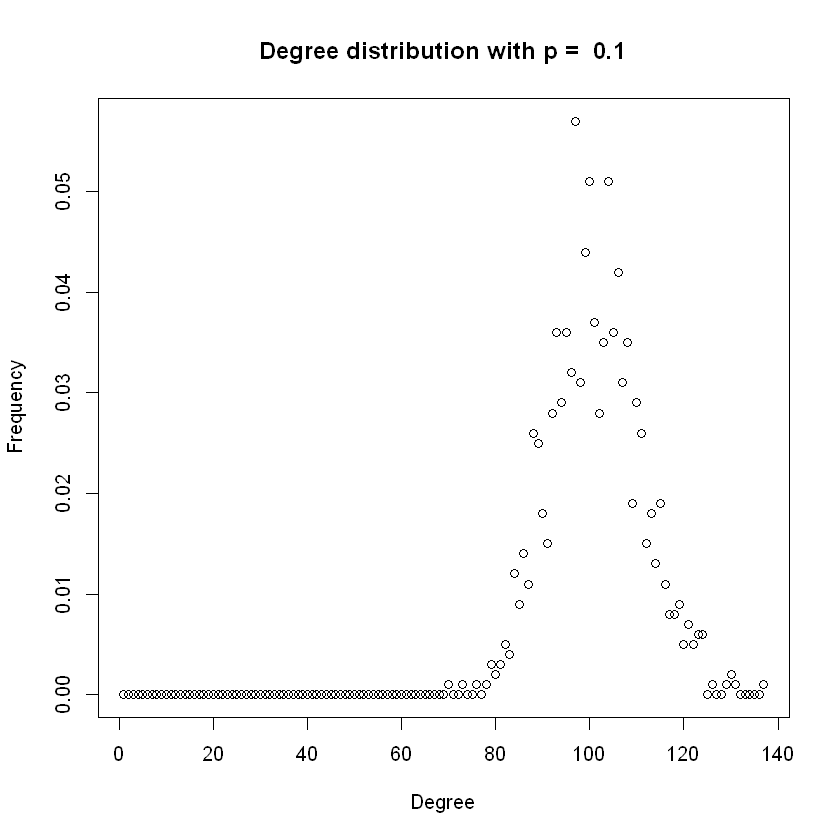

In [39]:
er_1ab(0.1)